<a href="https://colab.research.google.com/github/rishabhshah13/Adversarial_Patch_XAI590/blob/main/Assignment%204/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4 - Interpretable ML II
## Rishabh Shah

In [4]:
pip install imodels lime shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.0/243.0 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 17.1 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=48e6e7b11b206cb0a937cef6ada89cd8de8ac41b7a1274254ac3365f57133da0
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [48]:
! git clone https://github.com/rishabhshah13/Adversarial_Patch_XAI590.git

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cloning into 'Adversarial_Patch_XAI590'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 117 (delta 45), reused 16 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (117/117), 10.54 MiB | 8.16 MiB/s, done.
Resolving deltas: 100% (45/45), done.


### 1. Import Libraries and Load Dataset

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imodels import RuleFitClassifier, SlipperClassifier, BoostedRulesClassifier
import lime
import lime.lime_tabular
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import imodels
from imodels import SLIMClassifier, OneRClassifier, BoostedRulesClassifier, FIGSClassifier, HSTreeClassifierCV
from imodels import SLIMRegressor, BayesianRuleListClassifier, RuleFitRegressor, GreedyRuleListClassifier
from imodels.discretization import ExtraBasicDiscretizer
import numpy as np
from scipy.io.arff import loadarff
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
from imodels import get_clean_dataset, HSTreeClassifierCV # import any imodels model here

# prepare data (a sample clinical dataset)
X, y, feature_names = get_clean_dataset('heart')


feature_names = feature_names #[:20]
X = X #[:40,:20]
y = y #[:40]
# Create a DataFrame from X
df = pd.DataFrame(X,columns=feature_names)

# Add y as a new column named 'target'
df['target'] = y

df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


fetching heart from imodels


,att_1,att_2,att_3,att_4,att_5,att_6,att_7,att_8,att_9,att_10,att_11,att_12,att_13_-1.0,att_13_0.5,att_13_1.0,target
0,0.708333,1.0,1.000000,-0.320755,-0.105023,0.0,1.0,-0.419847,0.0,-0.225806,0.0,1.000000,1.0,0.0,0.0,1
1,0.583333,0.0,0.333333,-0.603774,1.000000,0.0,1.0,0.358779,0.0,-0.483871,0.0,-1.000000,0.0,0.0,1.0,0
2,0.166667,1.0,-0.333333,-0.433962,-0.383562,0.0,0.0,0.068702,0.0,-0.903226,0.0,-1.000000,0.0,0.0,1.0,1
3,0.458333,1.0,1.000000,-0.358491,-0.374429,0.0,0.0,-0.480916,1.0,-0.935484,0.0,-0.333333,0.0,0.0,1.0,0
4,0.875000,0.0,-0.333333,-0.509434,-0.347032,0.0,1.0,-0.236641,1.0,-0.935484,0.0,-0.333333,1.0,0.0,0.0,0


### 2. Data Cleaning and Processing

In [29]:
# Check for missing values
print(df.isnull().sum())

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns=['target']))


# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, df['target'], test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


att_1          0
att_2          0
att_3          0
att_4          0
att_5          0
att_6          0
att_7          0
att_8          0
att_9          0
att_10         0
att_11         0
att_12         0
att_13_-1.0    0
att_13_0.5     0
att_13_1.0     0
target         0
dtype: int64


### 3. Data Visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


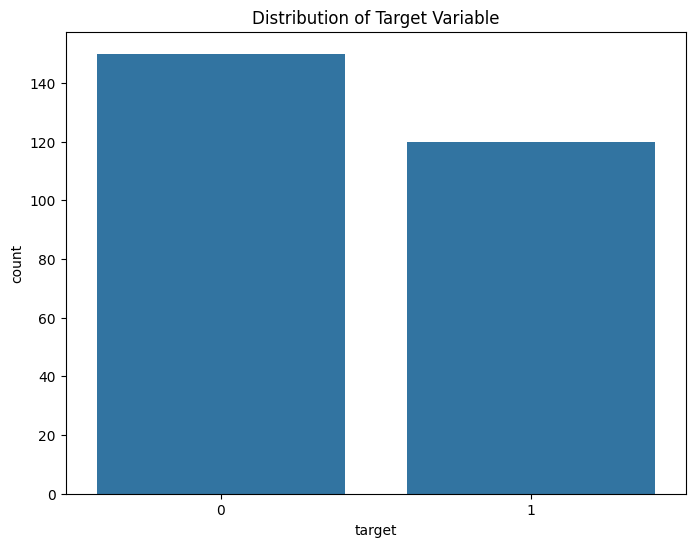

In [30]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8,6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


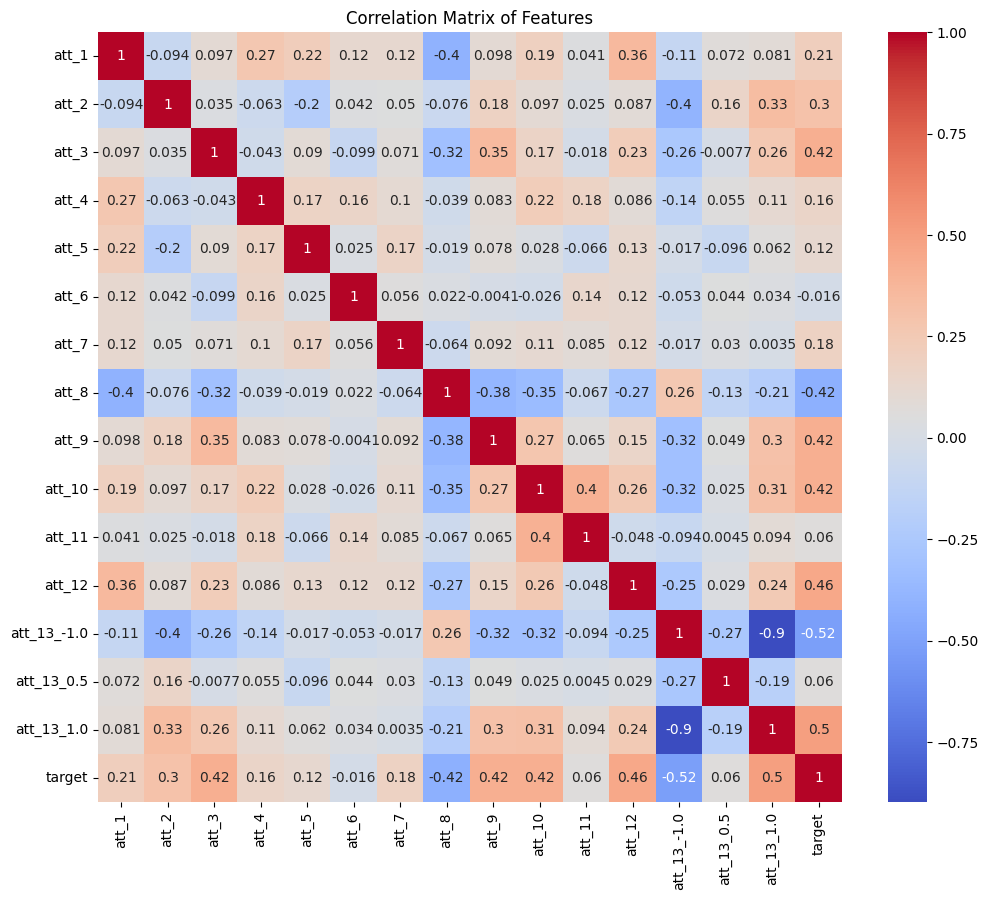

In [31]:
# Visualize correlations between features
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

### 4. RuleFit Model

The **RuleFit** model is a rule-based algorithm that combines decision trees and linear models. It extracts meaningful rules from decision trees and uses them in a linear model to make predictions. This hybrid approach captures non-linear interactions while maintaining interpretability.

**Interpretability**:
- RuleFit provides clear rules that are easy to interpret.
- Each rule describes a condition (e.g., `if feature1 > threshold and feature2 < threshold then class1`), making it human-readable.
- The contribution of each rule can be analyzed to understand the model’s decision-making process.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RuleFit Important Rules:
                                                                                      rule  \
1                                                                                       X1   
5                                                                                       X5   
8                                                                                       X8   
27                                                         X3 <= 1.43902 and X9 <= 0.56864   
32                                                                            X2 > 0.34368   
20                   X11 <= -0.18083 and X3 <= 1.99992 and X7 > -0.82939 and X9 <= 1.39972   
17                                        X2 <= 0.34368 and X3 <= 1.88774 and X9 <= 1.2685   
23                                       X14 <= 0.23593 and X8 <= 0.36243 and X9 <= 1.2685   
24                                                         X2 <= 0.34368 and X9 <= 0.83108   
29                                 

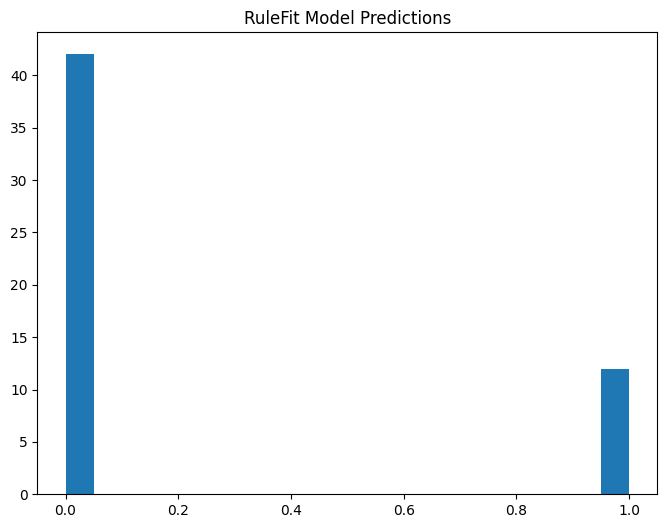

In [32]:
# Initialize and train the RuleFit model
rulefit = RuleFitClassifier()
rulefit.fit(X_train, y_train)

# Make predictions and evaluate the RuleFit model
rulefit_preds = rulefit.predict(X_test)

# Display important rules
print("RuleFit Important Rules:")
print(rulefit.visualize())

# Visualize RuleFit results
plt.figure(figsize=(8,6))
plt.title('RuleFit Model Predictions')
plt.hist(rulefit_preds, bins=20)
plt.show()

#### Interpreting RuleFit Rules for Heart Disease Prediction

The RuleFit model output shows a set of rules that are important for predicting heart disease risk. Here's how to interpret them concisely:

**utput:**

- **`X1, X2, ...` :** These represent the features in your dataset (e.g., `X1` might be age, `X2` might be cholesterol). You'll need to refer to your dataset's documentation or feature names to know what each `X` represents.
- **`>, <, <=, >=` :** These are comparison operators indicating thresholds for the features.
- **`AND` :** Connects multiple conditions within a rule; all conditions must be met for the rule to apply.
- **`rule` :** The combination of feature conditions that define the rule.
- (Implicit) **`THEN` :**  Although not explicitly shown, each rule implies a "THEN" clause – if the conditions in the "rule" are met, there's an associated prediction (e.g., higher or lower risk of heart disease).

**Example Interpretation:**


- **Rule 27: `X3 <= 1.43902 and X9 <= 0.56864`**
    - *If feature `X3` is less than or equal to 1.43902 AND feature `X9` is less than or equal to 0.56864, THEN this combination suggests a certain level of heart disease risk (the exact impact depends on the model's coefficients).*
- **Rule 32: `X2 > 0.34368`**
    - *If feature `X2` is greater than 0.34368, THEN this suggests a certain level of heart disease risk.*
- **Rule 20: `X11 <= -0.18083 and X3 <= 1.99992 and X7 > -0.82939 and X9 <= 1.39972`**
    - *This is a more complex rule involving four features. If all these conditions are met simultaneously, THEN it suggests a certain level of heart disease risk.*

**Key Takeaways:**

- **Feature Importance:** The higher a rule appears in the list, the more important it generally is in the model's prediction.
- **Risk Direction:**  The direction of the association (higher or lower risk) depends on the model's coefficients, which are not shown in this output. You can access these coefficients separately to determine the exact impact of each rule.

RuleFit provides a set of human-readable rules that highlight important interactions between features and their influence on heart disease risk

In [33]:
# RuleFit evaluation
print("RuleFit Model Accuracy:", accuracy_score(y_test, rulefit_preds))
print("RuleFit Model Confusion Matrix:\n", confusion_matrix(y_test, rulefit_preds))
print("RuleFit Model Classification Report:\n", classification_report(y_test, rulefit_preds))

RuleFit Model Accuracy: 0.8333333333333334
RuleFit Model Confusion Matrix:
 [[33  0]
 [ 9 12]]
RuleFit Model Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88        33
           1       1.00      0.57      0.73        21

    accuracy                           0.83        54
   macro avg       0.89      0.79      0.80        54
weighted avg       0.87      0.83      0.82        54



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
def viz_classification_preds(probs, y_test):
    '''look at prediction breakdown
    '''
    plt.subplot(121)
    plt.hist(probs[:, 1][y_test == 0], label='Class 0')
    plt.hist(probs[:, 1][y_test == 1], label='Class 1', alpha=0.8)
    plt.ylabel('Count')
    plt.xlabel('Predicted probability of class 1')
    plt.legend()

    plt.subplot(122)
    preds = np.argmax(probs, axis=1)
    plt.title('ROC curve')
    fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.plot(fpr, tpr)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RuleFit.svg

### 6. Greedy Rule List

The **Greedy Rule List (GRL)** algorithm builds a decision list (ordered sequence of rules) using a greedy search strategy. At each step, the algorithm selects the rule that optimally splits the data based on a predefined criterion (e.g., Gini index).

**Interpretability**:
- GRL outputs an interpretable list of rules in the form of `if-else` statements.
- This model is highly transparent since the rules are ordered, and every prediction can be traced back to the first rule that applies.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


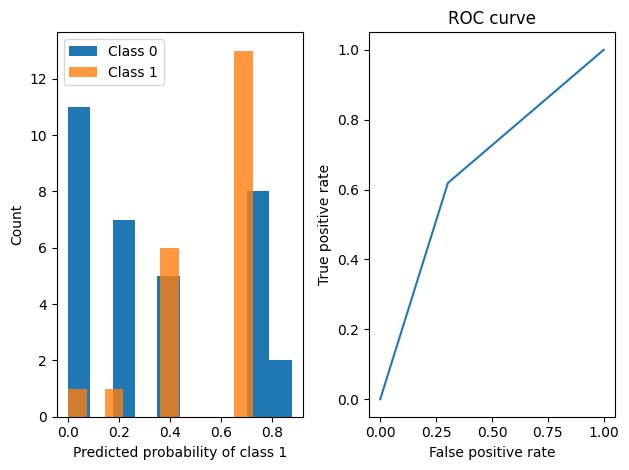

GreedyRuleListClassifier()

In [37]:
# fit a greedy rule list
m = GreedyRuleListClassifier()
m.fit(X_train, y=y_train, feature_names=feature_names)  # stores into m.rules_
probs = m.predict_proba(X_test)

# look at prediction breakdown
viz_classification_preds(probs, y_test)

m

#### Greedy Rule List Interpretation

This rule list predicts risk (likely of heart disease) using a series of if-then statements applied sequentially:

1. **Baseline:** 19.44% risk for all 216 patients.

2. **Rules:**
   - `IF att_3 THEN 72.2% risk (108 patients)`
   - `IF att_3 AND att_10 THEN 87.5% risk (8 patients)`
   - `IF att_3 AND NOT att_13 (likely above threshold) THEN 37.5% risk (24 patients)`
   - `IF att_3 AND NOT att_13 AND att_5 THEN 21.1% risk (19 patients)`
   - `IF att_3 AND NOT att_13 AND att_5 AND NOT att_4 THEN 20.0% risk (5 patients)`

3. **Default:** 0.0% risk for the remaining 52 patients who didn't meet any rule criteria.

**Key Points:**

- **Order matters:** The first rule met determines the risk.
- **Higher rules refine risk:** Subsequent rules increase or decrease risk within the subset of patients meeting earlier rules.
- **`att_#` are features:** Refer to your data to understand their meaning. `~` usually means "NOT".
- **Actionable insights:**  High-risk rules can guide clinical decisions.


**Example (assuming `att_3` is high blood pressure and `att_10` is high cholesterol):**

- High blood pressure increases risk to 72.2%.
- High blood pressure *and* high cholesterol further increases risk to 87.5%.

This list stratifies patients into risk groups based on these simple rules. Remember, the exact thresholds for each feature are not shown here.


GRL.svg

### 7. Rule Trees

**Rule Trees** are hierarchical models that represent decisions as tree-like structures. They are a combination of decision trees and rule-based methods, where rules are derived from paths in the decision tree.

**Interpretability**:
- Rule Trees are highly interpretable as they provide a visual tree structure, where each path from root to leaf represents a set of conditions (rules) leading to a final prediction.
- The tree structure helps in understanding the model’s logic at each decision node.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


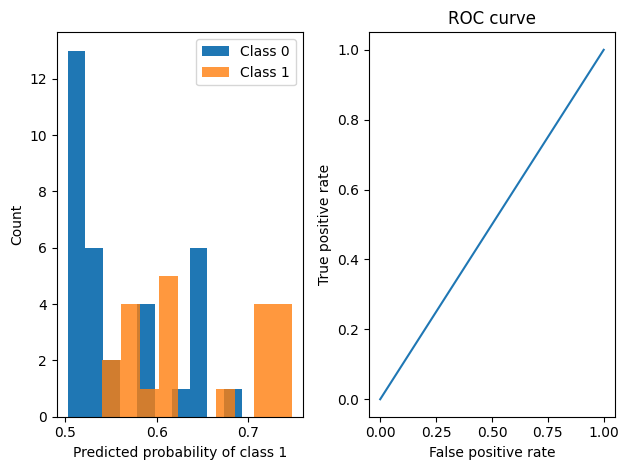

FIGSClassifier(max_rules=7)

In [42]:
# specify a decision tree with a maximum depth
figs = FIGSClassifier(max_rules=7)
figs.fit(X_train, y_train, feature_names=feature_names)

# calculate mse on the training data
probs = figs.predict_proba(X_test)
# print(f'test mse: {np.mean(np.square(preds-y)):0.2f}')
viz_classification_preds(probs, y_test)

figs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Alternative visualization:


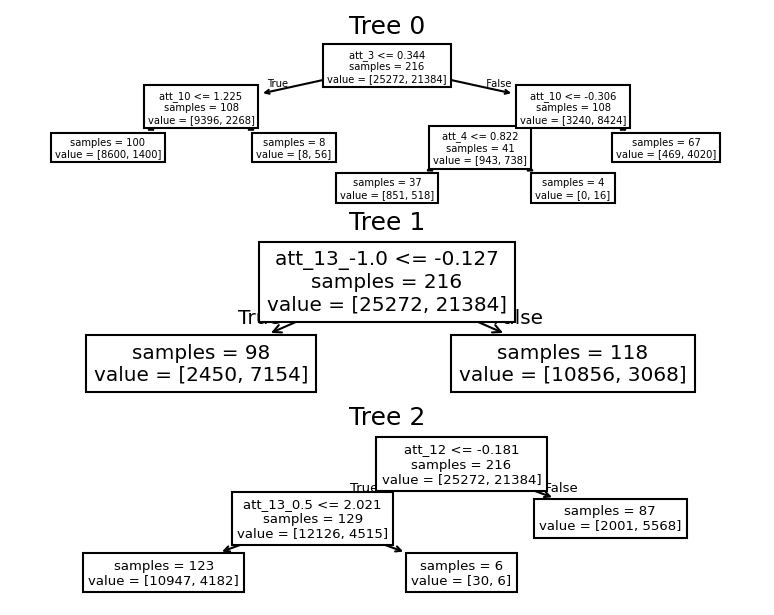

In [43]:
print('Alternative visualization:')
figs.plot()

#### FIGS (Fast Interpretable Greedy-Tree Sums)

FIGS predicts by summing the "Val" (value) from traversing a set of decision trees.  A sigmoid function is applied to the sum for classification (e.g., heart disease prediction).

**How it works:**

1. **Trees:** The output shows three decision trees. Each tree starts with a root node (e.g., `att_3 <= 0.344`).

2. **Splits:**  Trees branch based on feature thresholds (e.g., `att_10 <= 1.225`).

3. **Leaf Values ("Val"):** Each branch ends in a leaf with a numerical value.

4. **Summation and Sigmoid:** The "Val" from each tree's traversed path is summed.  A sigmoid function converts this sum into a probability between 0 and 1 (e.g., probability of heart disease).

**Example:**

Let's say a patient has:

- `att_3` = 0.2 (so they go left at the first split in Tree #0)
- `att_10` = 1.5 (so they go right at the next split in Tree #0)
- `att_13_-1.0` = 0.1 (so they go right in Tree #1)
- `att_12` = -0.2 (so they go left in Tree #2)
- `att_13_0.5` = 1.8 (so they go left in Tree #2)

Their prediction would be based on the sum: 0.210 (Tree #0) + (-0.149) (Tree #1) + (-0.050) (Tree #2) = 0.011.  This sum is then passed through the sigmoid function to get the final probability.

**Interpretation:**

- Each tree captures different aspects of the data.
- The "Val" at each leaf indicates the contribution of that branch to the prediction.  Positive values increase the likelihood of the positive class (e.g., heart disease), while negative values decrease it.

**Key Advantages:**

- **Interpretable:**  You can trace the decision path for each patient.
- **Fast:**  Predictions are quick because they involve simple tree traversals and a sum.


Remember: `att_#` represent your features. Consult your data documentation to understand their meaning.  This concise explanation focuses on *how* FIGS makes predictions.  Analyzing the specific thresholds and values within the trees provides deeper insights into the *why* behind those predictions.


Rule Trees.svg

### 7. Model Interpretability with LIME

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Intercept 0.6289377550699943
Prediction_local [0.95944532]
Right: 0.9984169179940752


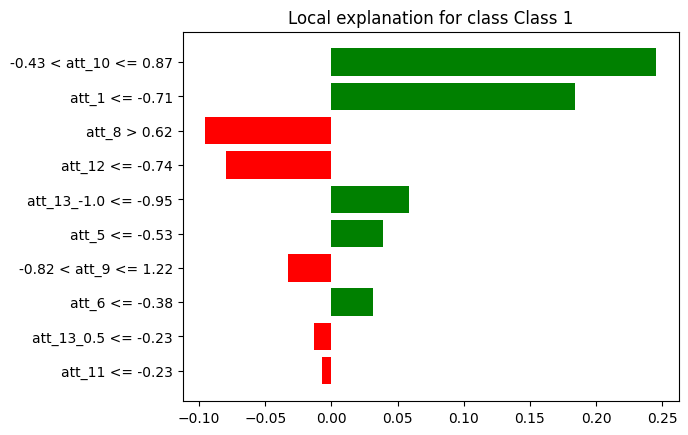

In [20]:

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=df.columns[:-1], class_names=['Class 0', 'Class 1'], verbose=True, mode='classification')

# Explain a single prediction from RuleFit model
exp = explainer.explain_instance(X_test[0], rulefit.predict_proba)
exp.show_in_notebook()

# Visualize LIME explanations
exp.as_pyplot_figure()
plt.show()